In [1]:
!nvidia-smi

Tue Jun 22 13:26:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# ***Importing Libraries***

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Importing Datasets***

In [4]:
(x_train,y_train), (x_test,y_test)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


##Ploting the first 9 images

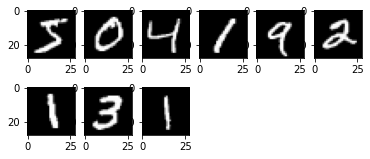

In [6]:
for i in range(9):
  plt.subplot(360+1+i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

# ***Data Preprocessing***

##Reshaping Dataset to have a single colour channel

In [7]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [8]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


##One hot encoding

In [9]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

##Normalizing the pixel values

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [11]:
print(y_train[0]) #5
print(y_train[4]) #9

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# ***Model***

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout,Flatten

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))

In [15]:
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.3))

In [16]:
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.4))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [19]:
model.add(Dense(units=10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0

##Compiling The Model

In [21]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])
history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=30)

Epoch 1/30
1875/1875 [==============================] - 55s 5ms/step - loss: 0.6448 - accuracy: 0.8049 - val_loss: 0.0660 - val_accuracy: 0.9792
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1320 - accuracy: 0.9610 - val_loss: 0.0542 - val_accuracy: 0.9836
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1026 - accuracy: 0.9700 - val_loss: 0.0441 - val_accuracy: 0.9862
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0861 - accuracy: 0.9739 - val_loss: 0.0404 - val_accuracy: 0.9883
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0742 - accuracy: 0.9783 - val_loss: 0.0451 - val_accuracy: 0.9869
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0663 - accuracy: 0.9801 - val_loss: 0.0341 - val_accuracy: 0.9896
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0565 - accuracy: 0.9822 - val_loss: 0.0386 - val_accuracy

In [22]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Mnist.h5')

In [23]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')

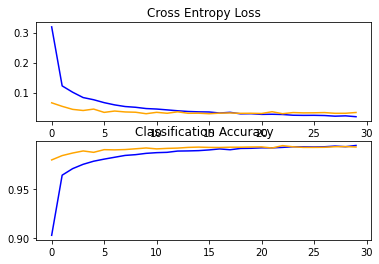

In [24]:
summarize_diagnostics(history)

##Accuracy Of The Model

In [25]:
scores = model.evaluate(x_test,y_test)
print('Accuracy: ',scores[1]*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.0338 - accuracy: 0.9923
Accuracy:  99.22999739646912


# ***Prediction for a New Image***

In [26]:
import cv2
from PIL import Image
from keras.preprocessing import image

(514, 452, 3)


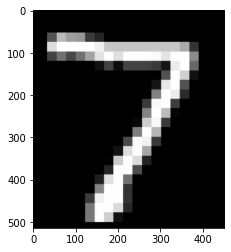

In [27]:
img=cv2.imread('/content/Image07.PNG')
print(img.shape)
plt.imshow(img)
plt.show()

In [28]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [29]:
img = load_img('/content/Image07.PNG', grayscale=True, target_size=(28, 28))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [30]:
img = img_to_array(img)
img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')
img = img / 255.0

In [31]:
digit = model.predict_classes(img)
print(digit[0])

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


7
